In [76]:
import dezero
import matplotlib.pyplot as plt
import numpy as np
import math
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

In [77]:
x, t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

(300, 2)
(300,)


In [78]:
print(x[0],t[0])
print(x[110],t[110])

[-0.13981389 -0.00721657] 1
[ 0.3282343  -0.54941994] 0


No handles with labels found to put in legend.


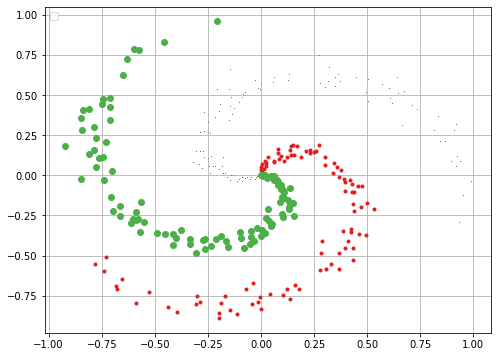

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
markers=[".", ",", "o"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a']
for idx, label in enumerate(np.unique(t)):
    indices = np.where(labels == label)[0]
    ax.plot(x[indices,0], x[indices,1], 'bo' ,marker=markers[idx],color=colorlist[idx])

ax.legend(loc="upper left")
plt.grid()
plt.show()

In [80]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

In [81]:
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

In [86]:
data_size = len(x)
max_iter = math.ceil(data_size / batch_size)
loss_history = []

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        batch_index = index[i * batch_size:(i+1)*batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]
        
        y = model(batch_x)
        loss = F.softmax_cross_entropy_simple(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_t)
        
    avg_loss = sum_loss / data_size
    loss_history.append(avg_loss)
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

epoch 1, loss 0.07
epoch 2, loss 0.07
epoch 3, loss 0.07
epoch 4, loss 0.07
epoch 5, loss 0.07
epoch 6, loss 0.07
epoch 7, loss 0.07
epoch 8, loss 0.07
epoch 9, loss 0.07
epoch 10, loss 0.07
epoch 11, loss 0.07
epoch 12, loss 0.07
epoch 13, loss 0.07
epoch 14, loss 0.07
epoch 15, loss 0.07
epoch 16, loss 0.07
epoch 17, loss 0.07
epoch 18, loss 0.08
epoch 19, loss 0.07
epoch 20, loss 0.07
epoch 21, loss 0.07
epoch 22, loss 0.07
epoch 23, loss 0.07
epoch 24, loss 0.07
epoch 25, loss 0.07
epoch 26, loss 0.07
epoch 27, loss 0.07
epoch 28, loss 0.07
epoch 29, loss 0.07
epoch 30, loss 0.07
epoch 31, loss 0.07
epoch 32, loss 0.07
epoch 33, loss 0.07
epoch 34, loss 0.07
epoch 35, loss 0.07
epoch 36, loss 0.07
epoch 37, loss 0.07
epoch 38, loss 0.07
epoch 39, loss 0.07
epoch 40, loss 0.07
epoch 41, loss 0.07
epoch 42, loss 0.07
epoch 43, loss 0.07
epoch 44, loss 0.07
epoch 45, loss 0.07
epoch 46, loss 0.06
epoch 47, loss 0.07
epoch 48, loss 0.06
epoch 49, loss 0.08
epoch 50, loss 0.07
epoch 51,

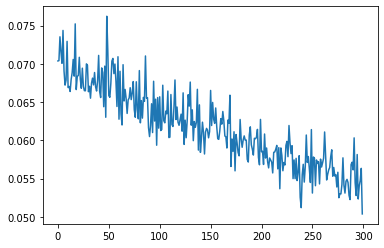

In [87]:
plt.plot(loss_history)